In [92]:
import pandas as pd     
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer

In [93]:
df = pd.read_csv("comments_raw.csv", header=0)
print(len(df))

18409


## Clean_text_data function get inspired from https://www.kaggle.com/code/blurredmachine/bag-of-words-meets-random-forest

In [94]:
def clean_text_data(datatext,index):
    datatext = str(datatext)
    comment_letters_only = re.sub("[^a-zA-Z]", " ", datatext)
    comment_lower_case = comment_letters_only.lower()  
    comment_words = comment_lower_case.split() 
    stop_words = stopwords.words("english")
    meaningful_words = [x for x in comment_words if x not in stop_words]
    if( (i)%2000 == 0 ):
            print("Cleaned %d of %d data (%d %%)." % ( i, data_size, ((i)/data_size)*100))
    return( " ".join( meaningful_words)) 

In [95]:
data_size = len(df)
for i in range(data_size):
    df.loc[i,'comment'] = clean_text_data(df.loc[i,'comment'], data_size)
print("Cleaning validation completed!")

Cleaned 0 of 18409 data (0 %).
Cleaned 2000 of 18409 data (10 %).
Cleaned 4000 of 18409 data (21 %).
Cleaned 6000 of 18409 data (32 %).
Cleaned 8000 of 18409 data (43 %).
Cleaned 10000 of 18409 data (54 %).
Cleaned 12000 of 18409 data (65 %).
Cleaned 14000 of 18409 data (76 %).
Cleaned 16000 of 18409 data (86 %).
Cleaned 18000 of 18409 data (97 %).
Cleaning validation completed!


In [96]:
x_pre_train, x_pre_test, y_train, y_test = train_test_split(df["comment"], df["Sentiment"], test_size = 0.2, random_state=42)

In [97]:
x_train = vectorizer.fit_transform(x_pre_train)
x_train = x_train.toarray()
print(x_train.shape)
x_test = vectorizer.fit_transform(x_pre_test)
x_test = x_test.toarray()
print(x_test.shape)

(14727, 480)
(14727, 480)


In [98]:
df_train = pd.DataFrame(x_train)
y_train = y_train.reset_index(drop=True)
df_train['label'] = y_train
df_test = pd.DataFrame(x_test)
y_test = y_test.reset_index(drop=True)
df_test['label'] = y_test
df_train.to_csv('train_data.csv', index=False)
df_test.to_csv('test_data.csv', index=False)

max_features = 5, Cross-Validation Error = 0.381
max_features = 30, Cross-Validation Error = 0.378
max_features = 55, Cross-Validation Error = 0.358
max_features = 80, Cross-Validation Error = 0.353
max_features = 105, Cross-Validation Error = 0.346
max_features = 130, Cross-Validation Error = 0.340
max_features = 155, Cross-Validation Error = 0.335
max_features = 180, Cross-Validation Error = 0.328
max_features = 205, Cross-Validation Error = 0.325
max_features = 230, Cross-Validation Error = 0.322
max_features = 255, Cross-Validation Error = 0.318
max_features = 280, Cross-Validation Error = 0.309
max_features = 305, Cross-Validation Error = 0.310
max_features = 330, Cross-Validation Error = 0.307
max_features = 355, Cross-Validation Error = 0.307
max_features = 380, Cross-Validation Error = 0.308
max_features = 405, Cross-Validation Error = 0.309
max_features = 430, Cross-Validation Error = 0.306
max_features = 455, Cross-Validation Error = 0.307
max_features = 480, Cross-Validation

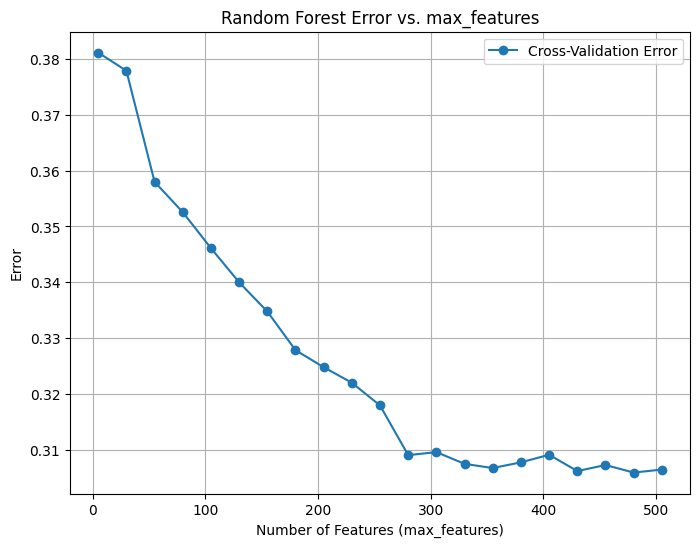

In [99]:
# CountVectorizer vectorizes the text data, and uses k-map cross validation (k=5) for hyper-parameter tuning of max_features.
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
max_features = []
trainError = []
testError = []
for i in np.arange(5, 525, 25):
    vectorizer = CountVectorizer(analyzer="word",
                             ngram_range=(1, 2),
                             min_df=2,
                             max_df=0.8,
                             max_features=i)
    x_train = vectorizer.fit_transform(x_pre_train)
    model_R = RandomForestClassifier(random_state=42)
    cv_scores = cross_val_score(model_R, x_train, y_train, cv=5)
    
    train_error = 1 - np.mean(cv_scores)
    
    max_features.append(i)
    trainError.append(train_error)
    
    print(f"max_features = {i}, Cross-Validation Error = {train_error:.3f}")

plt.figure(figsize=(8, 6))
plt.plot(max_features, trainError, marker='o', label="Cross-Validation Error")
plt.grid(True)
plt.legend()
plt.xlabel('Number of Features (max_features)')
plt.ylabel('Error')
plt.title('Random Forest Error vs. max_features')
plt.savefig('RF_Vectorizer_Maxfeatures_CV.png')
plt.show()

## Minimum Cross-Validation Error = 0.306 when max_features = 430, 480, 505
## Choose max_features = 480 for vectorizer

max_features = 5, Cross-Validation Error = 0.306
max_features = 6, Cross-Validation Error = 0.308
max_features = 7, Cross-Validation Error = 0.305
max_features = 8, Cross-Validation Error = 0.302
max_features = 9, Cross-Validation Error = 0.305
max_features = 10, Cross-Validation Error = 0.304
max_features = 11, Cross-Validation Error = 0.304
max_features = 13, Cross-Validation Error = 0.306
max_features = 14, Cross-Validation Error = 0.303
max_features = 16, Cross-Validation Error = 0.306
max_features = 18, Cross-Validation Error = 0.304
max_features = 21, Cross-Validation Error = 0.304
max_features = 25, Cross-Validation Error = 0.306
max_features = 30, Cross-Validation Error = 0.307
max_features = 37, Cross-Validation Error = 0.308
max_features = 47, Cross-Validation Error = 0.308
max_features = 61, Cross-Validation Error = 0.308
max_features = 82, Cross-Validation Error = 0.311
max_features = 115, Cross-Validation Error = 0.311
max_features = 171, Cross-Validation Error = 0.316
max

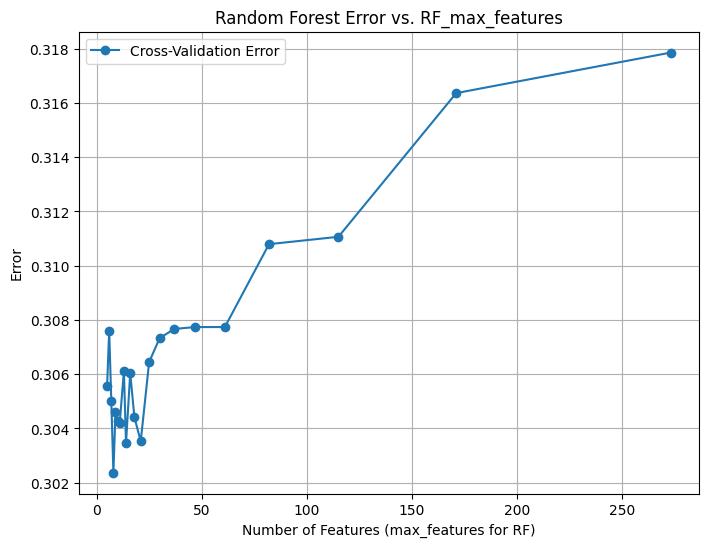

In [91]:
# Random forest with entropy, effect of max_features
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 480)
x_train = vectorizer.fit_transform(x_pre_train)
max_features = []
trainError = []
testError = []
features = x_train.shape[1]
for i in np.arange(4, 1, -0.1):
    max_feature = max(5, int(features ** (1 / i)))
    if max_feature in max_features:
        continue
    model_R = RandomForestClassifier(max_features = max_feature,random_state=42)
    cv_scores = cross_val_score(model_R, x_train, y_train, cv=5)
    
    train_error = 1 - np.mean(cv_scores)
    
    max_features.append(max_feature)
    trainError.append(train_error)
    
    print(f"max_features = {max_feature}, Cross-Validation Error = {train_error:.3f}")
    
plt.figure(figsize=(8, 6))
plt.plot(max_features, trainError, marker='o', label="Cross-Validation Error")
plt.grid(True)
plt.legend()
plt.xlabel('Number of Features (max_features for RF)')
plt.ylabel('Error')
plt.title('Random Forest Error vs. RF_max_features')
plt.savefig('RF_Maxfeatures_CV.png')
plt.show()

max_features = 5, Cross-Validation Error = 0.306
max_features = 6, Cross-Validation Error = 0.308
max_features = 7, Cross-Validation Error = 0.305
max_features = 8, Cross-Validation Error = 0.305
max_features = 9, Cross-Validation Error = 0.305
max_features = 10, Cross-Validation Error = 0.303
max_features = 11, Cross-Validation Error = 0.304
max_features = 13, Cross-Validation Error = 0.303
max_features = 14, Cross-Validation Error = 0.306
max_features = 16, Cross-Validation Error = 0.307
max_features = 18, Cross-Validation Error = 0.306
max_features = 21, Cross-Validation Error = 0.306
max_features = 25, Cross-Validation Error = 0.304
max_features = 30, Cross-Validation Error = 0.306
max_features = 37, Cross-Validation Error = 0.307
max_features = 47, Cross-Validation Error = 0.309
max_features = 61, Cross-Validation Error = 0.309
max_features = 82, Cross-Validation Error = 0.311
max_features = 115, Cross-Validation Error = 0.314
max_features = 171, Cross-Validation Error = 0.315
max

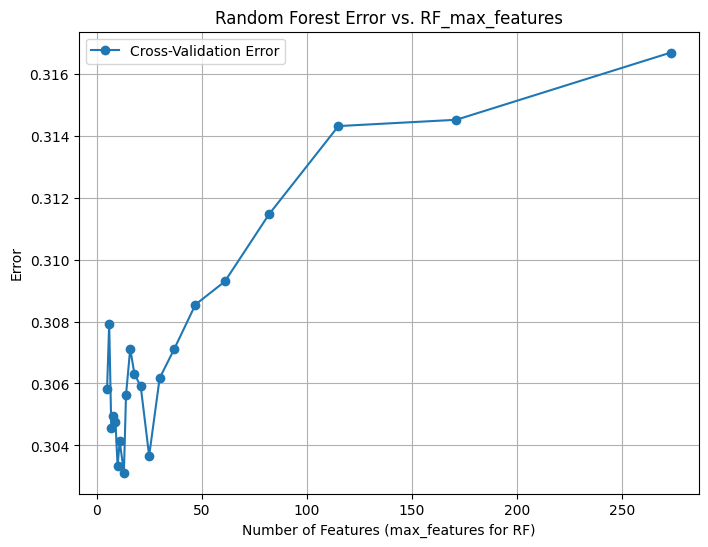

In [101]:
# Random forest with entropy, effect of max_features
vectorizer = CountVectorizer(analyzer="word",
                             ngram_range=(1, 2),
                             min_df=2,
                             max_df=0.8,
                             max_features=480)
x_train = vectorizer.fit_transform(x_pre_train)
max_features = []
trainError = []
testError = []
features = x_train.shape[1]
for i in np.arange(4, 1, -0.1):
    max_feature = max(5, int(features ** (1 / i)))
    if max_feature in max_features:
        continue
    model_R = RandomForestClassifier(max_features = max_feature,random_state=42)
    cv_scores = cross_val_score(model_R, x_train, y_train, cv=5)
    
    train_error = 1 - np.mean(cv_scores)
    
    max_features.append(max_feature)
    trainError.append(train_error)
    
    print(f"max_features = {max_feature}, Cross-Validation Error = {train_error:.3f}")
    
plt.figure(figsize=(8, 6))
plt.plot(max_features, trainError, marker='o', label="Cross-Validation Error")
plt.grid(True)
plt.legend()
plt.xlabel('Number of Features (max_features for RF)')
plt.ylabel('Error')
plt.title('Random Forest Error vs. RF_max_features')
plt.savefig('RF_Maxfeatures_CV.png')
plt.show()

## Minimum Cross-Validation Error = 0.303 when max_features = 10, 13
## Choose max_features = 10 for RF

The number of trees = 1, Cross-Validation Error = 0.384
The number of trees = 6, Cross-Validation Error = 0.332
The number of trees = 11, Cross-Validation Error = 0.317
The number of trees = 16, Cross-Validation Error = 0.310
The number of trees = 21, Cross-Validation Error = 0.310
The number of trees = 26, Cross-Validation Error = 0.309
The number of trees = 31, Cross-Validation Error = 0.308
The number of trees = 36, Cross-Validation Error = 0.303
The number of trees = 41, Cross-Validation Error = 0.304
The number of trees = 46, Cross-Validation Error = 0.306
The number of trees = 51, Cross-Validation Error = 0.305
The number of trees = 56, Cross-Validation Error = 0.306
The number of trees = 61, Cross-Validation Error = 0.305
The number of trees = 66, Cross-Validation Error = 0.304
The number of trees = 71, Cross-Validation Error = 0.304
The number of trees = 76, Cross-Validation Error = 0.302
The number of trees = 81, Cross-Validation Error = 0.303
The number of trees = 86, Cross-V

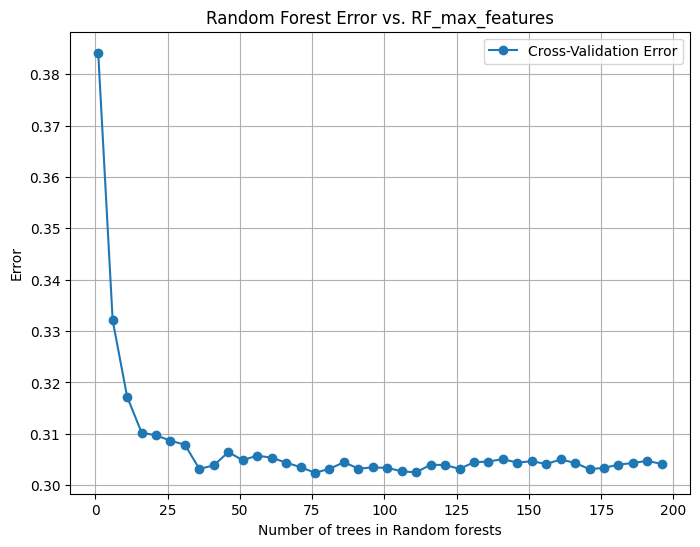

In [102]:
vectorizer = CountVectorizer(analyzer="word",
                             ngram_range=(1, 2),
                             min_df=2,
                             max_df=0.8,
                             max_features=480)
x_train = vectorizer.fit_transform(x_pre_train)
numberTrees = []
trainError = []
testError = []
for numberTree in range(1 , 200, 5):
    model_R = RandomForestClassifier(n_estimators = numberTree, max_features = 10, random_state = 42)
    cv_scores = cross_val_score(model_R, x_train, y_train, cv=5)
    
    train_error = 1 - np.mean(cv_scores)
    
    numberTrees.append(numberTree)
    trainError.append(train_error)
    
    print(f"The number of trees = {numberTree}, Cross-Validation Error = {train_error:.3f}")
    
plt.figure(figsize=(8, 6))
plt.plot(numberTrees, trainError, marker='o', label="Cross-Validation Error")
plt.grid(True)
plt.legend()
plt.xlabel('Number of trees in Random forests')
plt.ylabel('Error')
plt.title('Random Forest Error vs. RF_max_features')
plt.savefig('RF_NumberOfTrees_CV.png')
plt.show()

## Minimum Cross-Validation Error = 0.302 when max_features = 76
## Choose n_estimators = 76 for RF

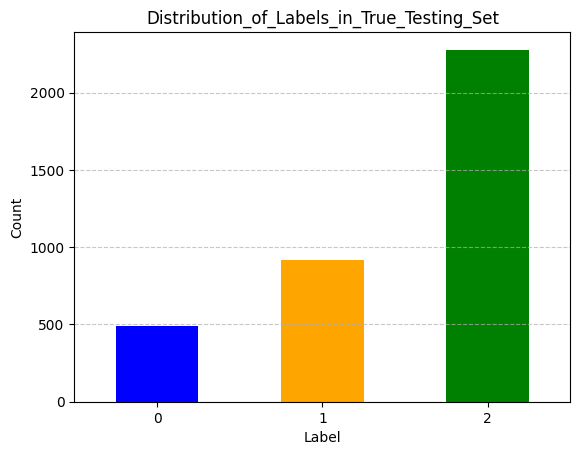

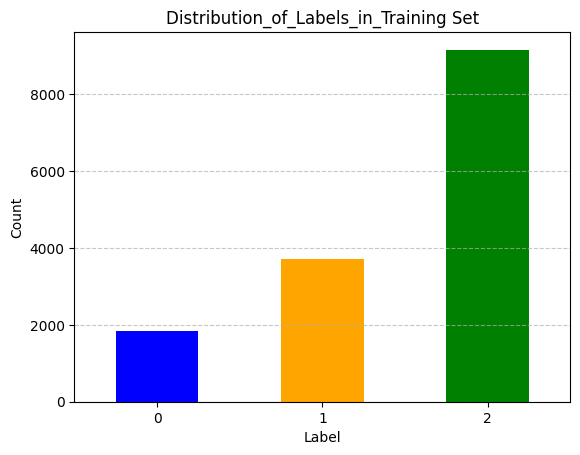

In [122]:
df_test['label'].value_counts().sort_index().plot(kind='bar', color=['blue', 'orange', 'green'])
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution_of_Labels_in_True_Testing_Set")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig('Distribution_of_True_Testing_set.png')
plt.show()

df_train['label'].value_counts().sort_index().plot(kind='bar', color=['blue', 'orange', 'green'])
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Distribution_of_Labels_in_Training Set")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig('Distribution_of_Training_set.png')
plt.show()

In [123]:
from sklearn.metrics import classification_report, accuracy_score
vectorizer = CountVectorizer(analyzer="word",
                             ngram_range=(1, 2),
                             min_df=2,
                             max_df=0.8,
                             max_features=480)
x_train = vectorizer.fit_transform(x_pre_train)
model = RandomForestClassifier(n_estimators = 76,max_features = 10, random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

report = classification_report(y_test, y_pred, digits=4)
accuracy = accuracy_score(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0     0.1178    0.0840    0.0981       488
           1     0.3674    0.4700    0.4124       917
           2     0.6784    0.6438    0.6607      2277

    accuracy                         0.5263      3682
   macro avg     0.3879    0.3993    0.3904      3682
weighted avg     0.5266    0.5263    0.5243      3682



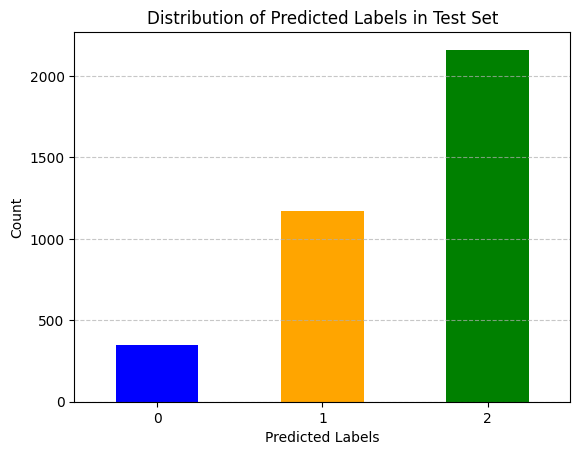

In [125]:
y_pred_series = pd.Series(y_pred)
y_pred_series.value_counts().sort_index().plot(kind='bar', color=['blue', 'orange', 'green'])

plt.xlabel("Predicted Labels")
plt.ylabel("Count")
plt.title("Distribution of Predicted Labels in Test Set")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig('Distribution_of_Predicted_Test_Set.png')
plt.show()